In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
  'data/fb_stock_prices_2018.csv',
  index_col='date',
  parse_dates=True
)

quakes = pd.read_csv('data/earthquakes.csv')

covid = pd.read_csv('data/covid19_cases.csv').assign(
  date=lambda x: \
  pd.to_datetime(x.dateRep, format='%d/%m/%Y')
  ).set_index('date').replace(
  'United_States_of_America', 'USA'
  ).sort_index()['2020-01-18':'2020-09-18']

<Axes: title={'center': 'evolution with time'}, xlabel='date'>

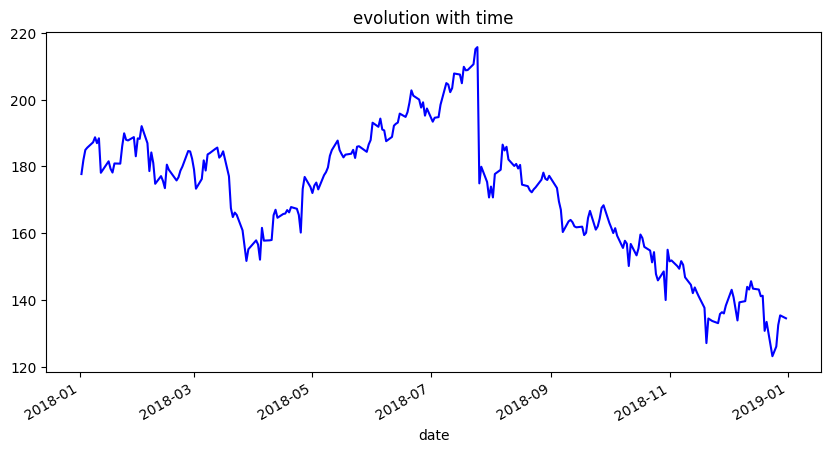

In [2]:
fb.plot(
  kind='line',
  y='open',
  figsize=(10,5),
  style='-b',
  legend=False,
  title='evolution with time'
)

/tmp/ipykernel_40286/3938238453.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W').plot(


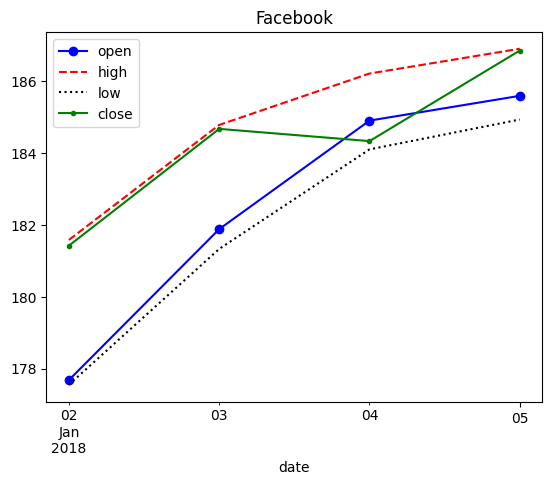

In [3]:
fb.first('1W').plot(
  y=['open', 'high', 'low', 'close'],
  style=['o-b', '--r', ':k', '.-g'],
  title='Facebook'
).autoscale()

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

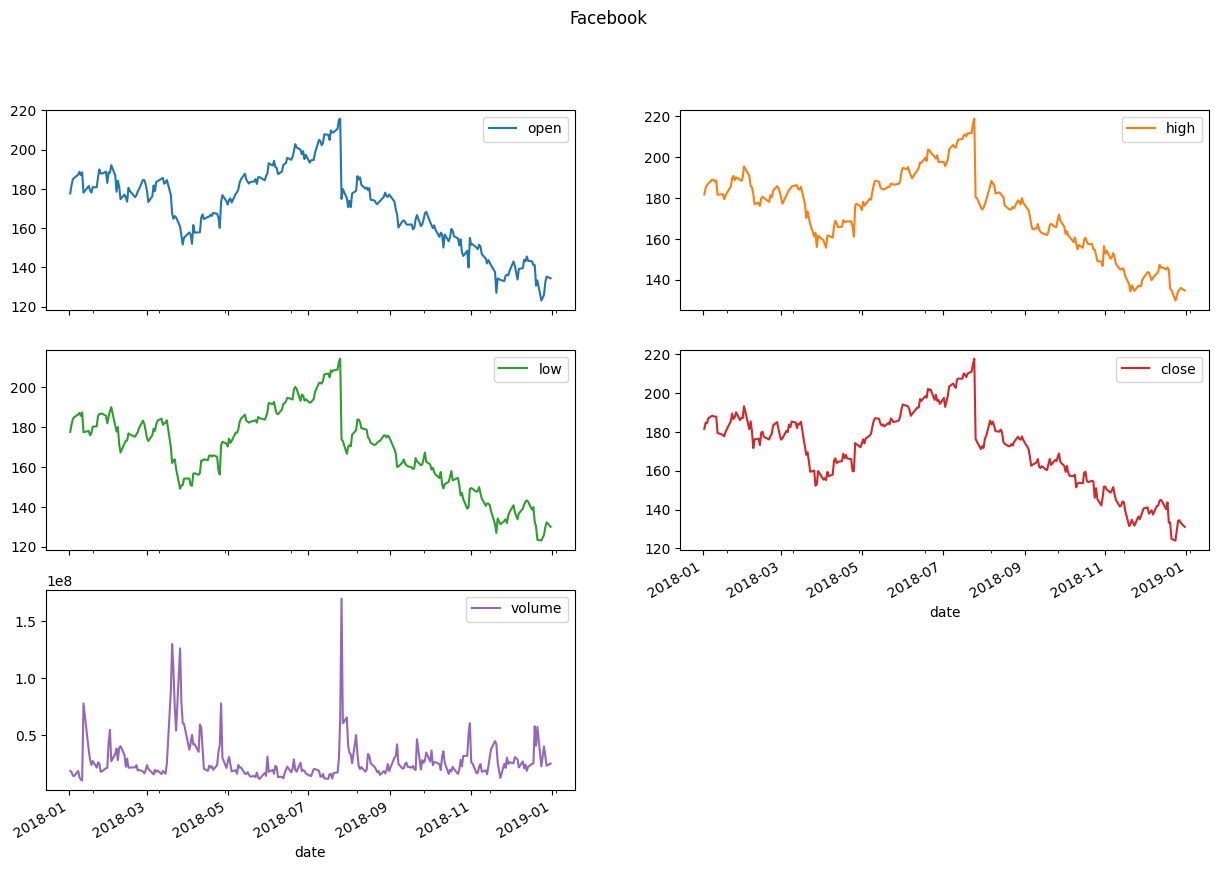

In [4]:
fb.plot(
  kind='line',
  subplots=True,
  layout=(3, 2),
  figsize=(15, 10),
  title='Facebook'
)

In [5]:
new_cases_rolling_average = covid.pivot_table(
  index=covid.index,
  columns='countriesAndTerritories',
  values='cases',
).rolling(7).mean()
new_cases_rolling_average.head(10)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.285714,NaN,NaN,NaN,NaN
2020-01-25,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.285714,NaN,NaN,NaN,NaN
2020-01-26,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.285714,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

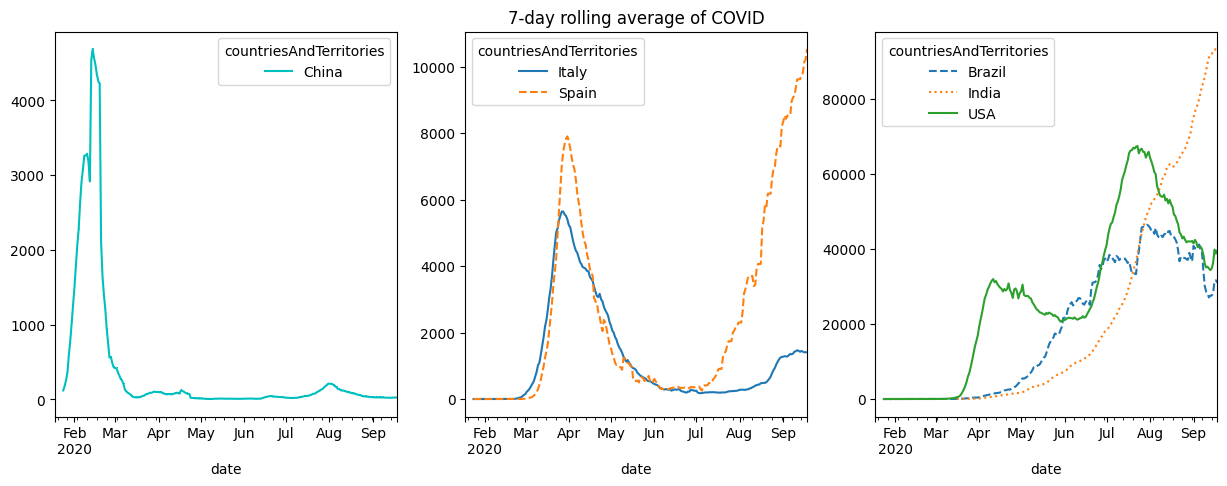

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
new_cases_rolling_average[['China']].plot(ax=axes[0], style='-,c')
new_cases_rolling_average[['Italy', 'Spain']].plot(ax=axes[1], style=['-', '--'],
                                                   title='7-day rolling average of COVID')
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2], style=['--', ':', '-'])

<Axes: title={'center': '7-day rolling'}, xlabel='date'>

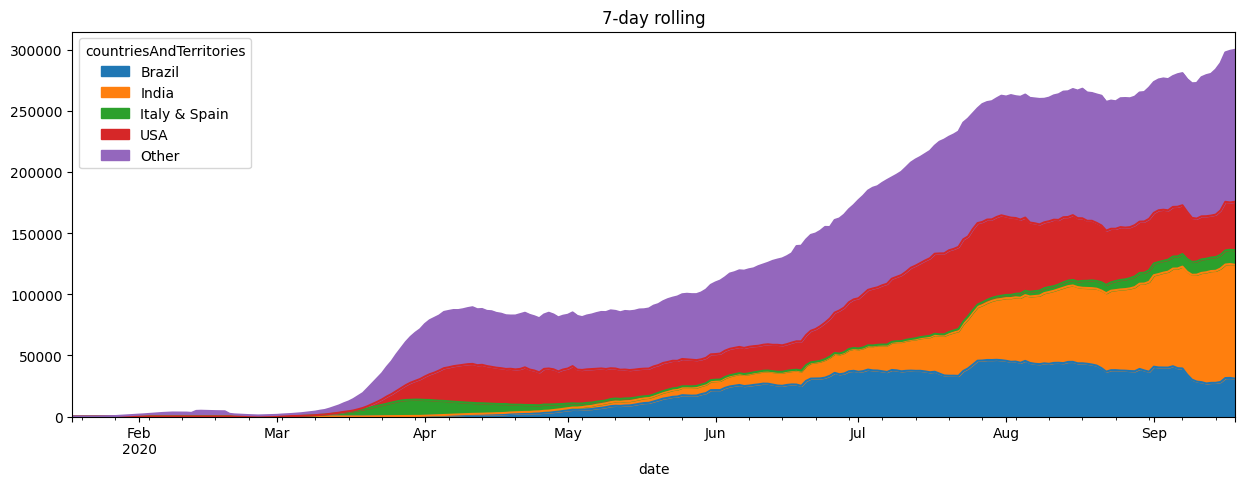

In [7]:
cols = [
  col for col in new_cases_rolling_average.columns
  if col not in [
    'USA', 'Brazil', 'India', 'Italy & Spain'
  ]
]
new_cases_rolling_average.assign(
  **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
  Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
  kind='area',
  figsize=(15,5),
  title='7-day rolling'
)

<Axes: xlabel='date'>

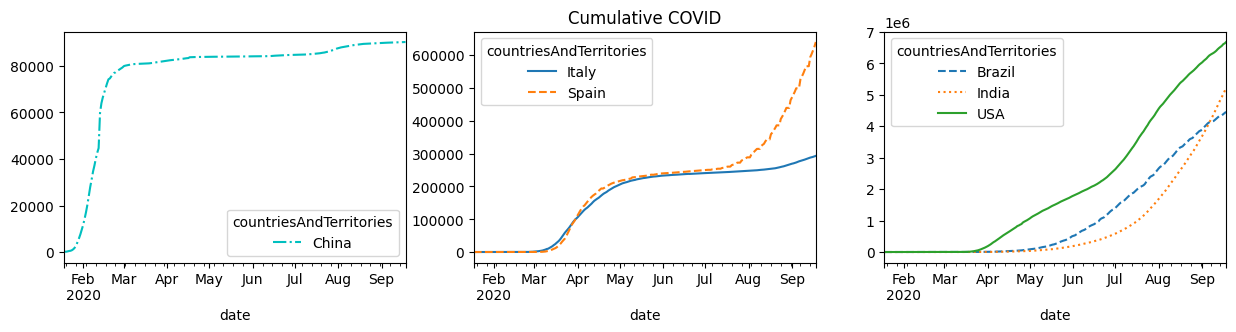

In [8]:
# Cumulative sum over time

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
cumulative_covid_cases = covid.groupby(
  ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
  ax=axes[1], style=['-', '--'],
  title='Cumulative COVID'
)
cumulative_covid_cases[['Brazil', 'India','USA']].plot(
  ax=axes[2], style=['--', ':', '-']
)

<Axes: title={'center': 'Facebook'}, xlabel='volume', ylabel='max_abs_change'>

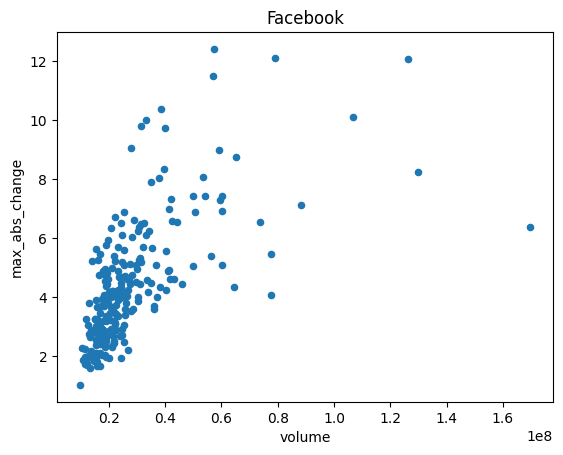

In [9]:
fb.assign(
  max_abs_change=fb.high - fb.low
).plot(
  kind='scatter', x='volume', y='max_abs_change',
  title='Facebook',
)

<Axes: title={'center': 'Facebook daily high - low vs.log(volume)'}, xlabel='volume', ylabel='max_abs_change'>

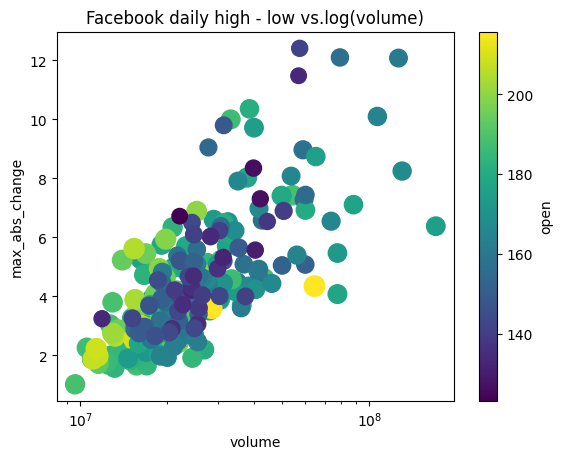

In [10]:
fb.assign(
  max_abs_change=fb.high - fb.low
).plot(
  kind='scatter', x='volume', y='max_abs_change',
  s=fb.close, c='open', colormap='viridis',
  title='Facebook daily high - low vs.log(volume)',
  logx=True,
)

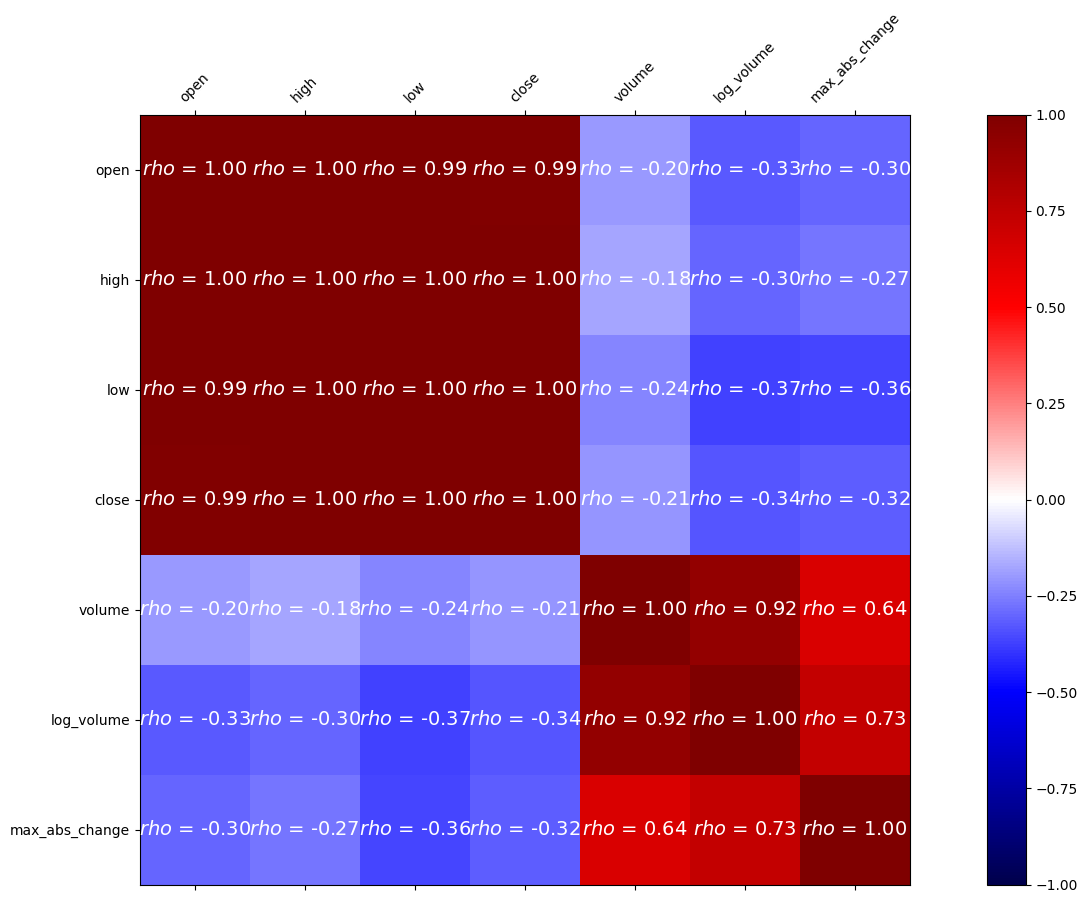

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
fb_corr = fb.assign(
  log_volume=np.log(fb.volume),
  max_abs_change=fb.high - fb.low
).corr()

im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(labels)

for (i, j), coef in np.ndenumerate(fb_corr):
  ax.text(
    i, j, fr'$rho$ = {coef:.2f}',
    ha='center', va='center',
    color='white', fontsize=14
  )
